<a href="https://colab.research.google.com/github/Victorvv1/Curso-de-Analisis-de-Datos-/blob/main/Operaciones_en_Arrays_Difusion_de_Datos_(Broadcasting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Broadcasting

## Introducción

In [ ]:
import numpy as np

In [ ]:
a = np.array([1, 2, 3])
b = np.array([5, 5, 5])
a + b

array([6, 7, 8])

In [ ]:
a + 5

array([6, 7, 8])

In [ ]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
M + a

array([[2., 3., 4.],
       [2., 3., 4.],
       [2., 3., 4.]])

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [ ]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

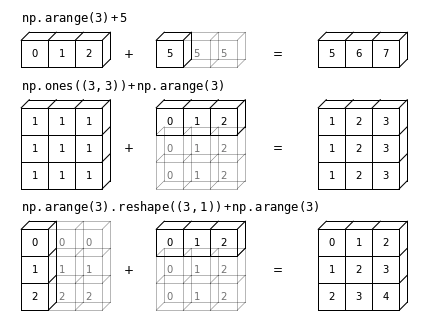!

### Reglas de Broadcasting en Numpy
El broadcasting es un mecanismo que permite a NumPy trabajar con arrays de diferentes formas cuando realiza operaciones aritméticas. Esto hace posible realizar operaciones entre arrays sin tener que crear copias de datos.

### Regla 1: Diferente número de dimensiones

Cuando dos arrays tienen diferente número de dimensiones, la forma del array con menos dimensiones se "rellena" con unos en su lado izquierdo (dimensiones principales).

**Ejemplo:**
```python
A = np.array([1, 2, 3])         # Forma: (3,)
B = np.array([[1], [2], [3]])   # Forma: (3, 1)
```

Para poder operar A con B:
- A tiene forma (3,)
- Se añade una dimensión a la izquierda, quedando con forma (1, 3)

### Regla 2: Estiramiento de dimensiones unitarias

Si la forma de los dos arrays no coincide en alguna dimensión, el array con tamaño 1 en esa dimensión se "estira" para coincidir con el otro.

**Ejemplo:**
```python
A = np.array([[1, 2, 3]])       # Forma: (1, 3)
B = np.array([[1], [2], [3]])   # Forma: (3, 1)
```

Al operar A + B:
- A se estira en la primera dimensión de (1, 3) a (3, 3)
- B se estira en la segunda dimensión de (3, 1) a (3, 3)
- El resultado tendrá forma (3, 3)

Internamente, esto ocurre sin duplicar memoria.

### Regla 3: Error cuando los tamaños no coinciden

Si en alguna dimensión los tamaños de los arrays no coinciden y ninguno es igual a 1, se produce un error.

**Ejemplo (error):**
```python
A = np.array([[1, 2, 3]])       # Forma: (1, 3)
B = np.array([[1, 2], [3, 4]])  # Forma: (2, 2)
```

Esto producirá un error porque en la segunda dimensión A tiene tamaño 3 y B tiene tamaño 2, y ninguno es 1.

## Ejemplos detallados

### Ejemplo 1: Escalar + Vector
```python
a = 5                    # Escalar (considerado como array de forma ())
b = np.array([1, 2, 3])  # Vector de forma (3,)
```

Aplicando las reglas:
1. El escalar se convierte a forma (1,)
2. Se estira para coincidir con b, resultando en [5, 5, 5]
3. El resultado de a + b será [6, 7, 8]

### Ejemplo 2: Vector + Matriz
```python
a = np.array([1, 2, 3])           # Vector de forma (3,)
b = np.array([[1, 2, 3],
               [4, 5, 6]])         # Matriz de forma (2, 3)
```

Aplicando las reglas:
1. a se convierte a forma (1, 3)
2. a se estira a forma (2, 3) para coincidir con b
3. El resultado será [[2, 4, 6], [5, 7, 9]]

### Ejemplo 3: Matrices de diferentes dimensiones
```python
a = np.array([[[1, 2]]])          # Forma (1, 1, 2)
b = np.array([[3, 4], [5, 6]])    # Forma (2, 2)
```

Aplicando las reglas:
1. b se convierte a forma (1, 2, 2)
2. a se estira a forma (1, 2, 2)
3. El resultado será [[[4, 6], [6, 8]]]

Este mecanismo permite realizar operaciones complejas de manera eficiente sin necesidad de crear copias explícitas, ahorrando memoria y tiempo de procesamiento.

In [ ]:
A = np.array([[1, 2, 3]])       # Forma: (1, 3)
B = np.array([[1, 2], [3, 4]])  # Forma: (2, 2)
A + B

ValueError: operands could not be broadcast together with shapes (1,3) (2,2) 

In [ ]:
a = np.array([[[1, 2]]])          # Forma (1, 1, 2)
b = np.array([[3, 4], [5, 6]])    # Forma (2, 2)
print(a)
print(b)

[[[1 2]]]
[[3 4]
 [5 6]]


In [ ]:
a + b

array([[[4, 6],
        [6, 8]]])

## Broadcasting en Práctica

In [ ]:
rng = np.random.default_rng(seed=1701)
X = rng.random((10, 3))
X

array([[0.4020733 , 0.30563311, 0.67668051],
       [0.15821208, 0.79247763, 0.09419469],
       [0.36753944, 0.06388928, 0.96431608],
       [0.35200998, 0.54550343, 0.88597945],
       [0.57016965, 0.26614394, 0.8170382 ],
       [0.55906652, 0.06387035, 0.84877751],
       [0.89414484, 0.18920785, 0.23660015],
       [0.16502896, 0.56583856, 0.29513111],
       [0.29078012, 0.90079544, 0.59992434],
       [0.09133896, 0.00578466, 0.97096222]])

In [ ]:
Xmean = X.mean(0)
Xmean

array([0.38503638, 0.36991443, 0.63896043])

In [ ]:
X_centered = X - Xmean
X_centered

array([[ 0.01703691, -0.06428131,  0.03772009],
       [-0.2268243 ,  0.4225632 , -0.54476574],
       [-0.01749695, -0.30602514,  0.32535566],
       [-0.0330264 ,  0.175589  ,  0.24701902],
       [ 0.18513326, -0.10377048,  0.17807777],
       [ 0.17403013, -0.30604408,  0.20981709],
       [ 0.50910846, -0.18070657, -0.40236028],
       [-0.22000743,  0.19592414, -0.34382932],
       [-0.09425626,  0.53088102, -0.03903608],
       [-0.29369742, -0.36412976,  0.33200179]])

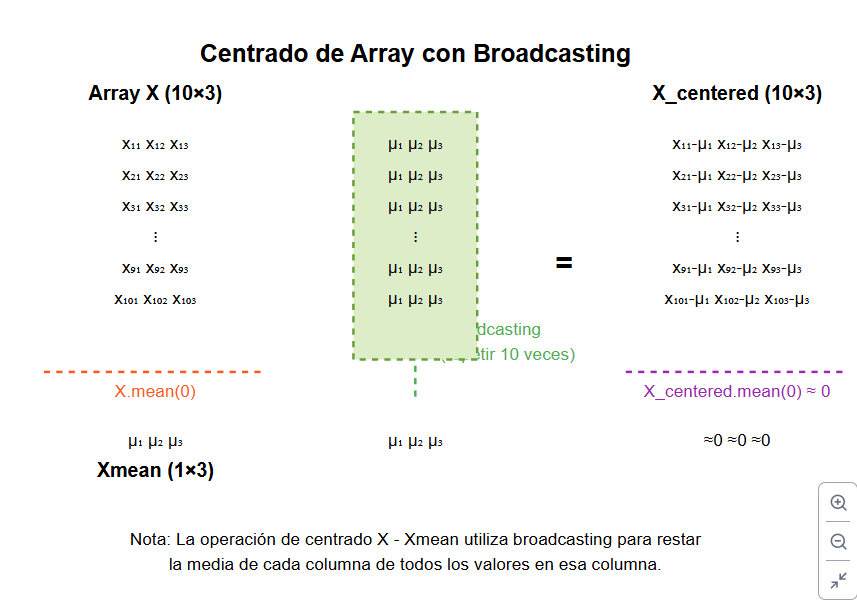

## Dibujando una función de 2 dimensiones

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

print(x, x.shape)
print(y, y.shape)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ] (50,)
[[0.        ]
 [0.10204082]
 [0.20408163]
 [0.30612245]
 [0.40816327]
 [0.51020408]
 [0.6122449 ]
 [0.71428571]
 [0.81632653]
 [0.91836735]
 [1.02040816]
 [1.12244898]
 [1.2244898 ]
 [1.32653061]
 [1.42857143]
 [1.53061224]
 [1.63265306]
 [1.73469388]
 [1.83673469]
 [1.93877551]
 [2.04081633]
 [2.14285714]
 [2.24489796]
 [2.34693878]
 [2.44897959]
 [2.55102041]
 [2.65306122]
 [2.75510204]
 [2.85714286]
 [2.95918367]
 [3.06122449]


In [ ]:
z = np.sin(x) **  10 + np.cos(10 + y * x) * np.cos(x)
print(z, z.shape)

[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.82902677 -0.8103873  ...  0.92522407  0.75321348
   0.52508175]
 [-0.83907153 -0.82325668 -0.79876457 ...  0.96427357  0.84172689
   0.66446403]
 ...
 [-0.83907153 -0.48233077 -0.01646558 ...  0.96449925  0.75196531
   0.41982581]
 [-0.83907153 -0.47324558  0.00392612 ...  0.92542163  0.68540362
   0.37440839]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]] (50, 50)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

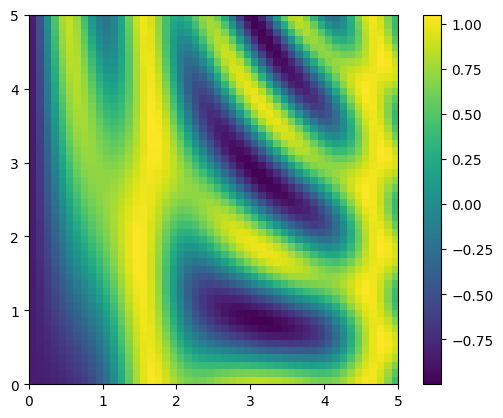

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar()

Cuando queremos visualizar una función bidimensional del tipo z = f(x, y), necesitamos evaluar esta función en una malla de puntos (x, y). El broadcasting nos permite hacer esto de manera eficiente.

### Paso 1: Crear los vectores base x e y

```python
# x y y tienen 50 pasos desde 0 hasta 5
x = np.linspace(0, 5, 50)           # Vector 1D: forma (50,)
y = np.linspace(0, 5, 50)[:, np.newaxis]  # Vector columna 2D: forma (50, 1)
```

Analicemos qué está sucediendo:
- `np.linspace(0, 5, 50)` crea un vector con 50 valores equidistantes entre 0 y 5
- `[:, np.newaxis]` convierte el vector y en una matriz columna añadiendo una nueva dimensión

### Paso 2: Aprovechamiento del broadcasting

Cuando operamos con `x` y `y`:
- `x` tiene forma (50,)
- `y` tiene forma (50, 1)

Al realizar operaciones como `y * x`, ocurre el broadcasting:
1. `x` se expande a forma (1, 50)
2. Esta forma se transmite con `y` de forma (50, 1)
3. El resultado es una malla de forma (50, 50)

### Paso 3: Calcular la función para toda la malla

```python
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
```

Desglosemos esta operación:

1. `np.sin(x) ** 10`:
   - `x` tiene forma (50,)
   - `np.sin(x)` también tiene forma (50,)
   - Elevado a la potencia 10, mantiene la forma (50,)
   - Al combinarse con el resto, se hace broadcasting a (50, 50)

2. `y * x`:
   - `y` tiene forma (50, 1)
   - `x` tiene forma (50,)
   - El resultado de `y * x` tiene forma (50, 50), creando una malla completa

3. `np.cos(10 + y * x)`:
   - `10 + y * x` tiene forma (50, 50)
   - `np.cos(10 + y * x)` también tiene forma (50, 50)

4. `np.cos(x)`:
   - Tiene forma (50,)
   - Al multiplicarse por el término anterior, se hace broadcasting a (50, 50)

5. La suma final:
   - Ambos términos se expanden a forma (50, 50)
   - El resultado `z` tiene forma (50, 50)

### Paso 4: Visualización de la función con Matplotlib

```python
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5])
plt.colorbar()
```

- `imshow` muestra la matriz como una imagen donde los valores se representan como colores
- `origin='lower'` establece que el origen (0,0) está en la esquina inferior izquierda
- `extent=[0, 5, 0, 5]` define los límites del eje x e y (en lugar de usar índices de píxeles)
- `colorbar()` añade una barra de color que indica la correspondencia entre valores y colores

## Ventajas del broadcasting en este contexto

1. **Eficiencia computacional**: Evitamos bucles anidados para calcular z(x,y) en cada punto.

2. **Código vectorizado**: El código es más conciso y legible que la alternativa usando bucles:
   ```python
   # Alternativa con bucles (menos eficiente)
   z = np.zeros((50, 50))
   for i, yi in enumerate(np.linspace(0, 5, 50)):
       for j, xj in enumerate(np.linspace(0, 5, 50)):
           z[i, j] = np.sin(xj)**10 + np.cos(10 + yi*xj) * np.cos(xj)
   ```

3. **Memoria eficiente**: No es necesario crear matrices intermedias explícitas de x e y.

# Ejercicios de Broadcasting en NumPy

## Ejercicio 1: Operaciones básicas con Broadcasting

En este ejercicio practicarás operaciones básicas de broadcasting con arrays de diferentes dimensiones.

```python
import numpy as np

# 1.1 Crea un array unidimensional x con valores del 0 al 9
# Tu código aquí

# 1.2 Crea un array columna y con valores del 10 al 19 (usa reshape o np.newaxis)
# Tu código aquí

# 1.3 Suma los arrays x e y usando broadcasting y muestra el resultado
# ¿Qué forma tiene el resultado?
# Tu código aquí

# 1.4 Crea una matriz 3x3 de unos
# Tu código aquí

# 1.5 Multiplica la matriz de unos por el array x
# ¿Qué ocurre con cada fila de la matriz?
# Tu código aquí

# 1.6 Resta el array columna y a la matriz de unos
# ¿Qué ocurre con cada columna de la matriz?
# Tu código aquí
```

## Ejercicio 2: Broadcasting con matrices y vectores

En este ejercicio practicarás cómo usar broadcasting para realizar operaciones comunes en análisis de datos.

```python
import numpy as np

# 2.1 Crea una matriz de datos X con forma (4, 3) con valores aleatorios entre 0 y 1
# Tu código aquí

# 2.2 Calcula la media de cada columna de X
# Tu código aquí

# 2.3 Usa broadcasting para centrar los datos (restar a cada columna su media)
# Tu código aquí

# 2.4 Crea un array de pesos w con forma (3,) con valores [0.1, 0.5, 0.9]
# Tu código aquí

# 2.5 Usa broadcasting para multiplicar cada columna de X por el peso correspondiente
# Tu código aquí

# 2.6 Suma las filas de la matriz ponderada para obtener un vector de puntuaciones
# Tu código aquí
```

## Ejercicio 3: Visualización con Broadcasting

En este ejercicio usarás broadcasting para crear visualizaciones de funciones matemáticas.

```python
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Crea un array x con 50 valores equidistantes entre -5 y 5
# Tu código aquí

# 3.2 Crea un array y con 50 valores equidistantes entre -5 y 5
# y conviértelo en un array columna
# Tu código aquí

# 3.3 Usa broadcasting para calcular la distancia de cada punto (x,y) al origen
# Fórmula: d = sqrt(x² + y²)
# Tu código aquí

# 3.4 Usa la distancia para calcular z = sin(d)/d
# (Esta es la función seno cardinal o sinc en 2D)
# Para evitar la división por cero, puedes usar np.where o np.divide con out=np.zeros_like
# Tu código aquí

# 3.5 Visualiza la función como un mapa de calor
plt.figure(figsize=(10, 8))
# Tu código para mostrar z como una imagen
# plt.imshow(...)
# plt.colorbar()
# plt.title('Función seno cardinal 2D: sin(r)/r')
# plt.show()
```

### Soluciones

In [ ]:
import numpy as np

# 1.1 Crea un array unidimensional x con valores del 0 al 9
x = np.arange(10)
print(x)

# 1.2 Crea un array columna y con valores del 10 al 19 (usa reshape o np.newaxis)
y = np.arange(10, 20)[:, np.newaxis]
print(y)

# 1.3 Suma los arrays x e y usando broadcasting y muestra el resultado
# ¿Qué forma tiene el resultado?
resultado = x + y
print(resultado, resultado.shape)

# 1.4 Crea una matriz 3x3 de unos
unos = np.ones((3, 3))
print(unos)

# 1.5 Multiplica la matriz de unos por el array x
# ¿Qué ocurre con cada fila de la matriz?
producto = unos * x[:3]
print(producto)

# 1.6 Resta el array columna y a la matriz de unos
# ¿Qué ocurre con cada columna de la matriz?
resta = unos - y[:3]
print(y[:3])
print(resta)

[0 1 2 3 4 5 6 7 8 9]
[[10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
[[10 11 12 13 14 15 16 17 18 19]
 [11 12 13 14 15 16 17 18 19 20]
 [12 13 14 15 16 17 18 19 20 21]
 [13 14 15 16 17 18 19 20 21 22]
 [14 15 16 17 18 19 20 21 22 23]
 [15 16 17 18 19 20 21 22 23 24]
 [16 17 18 19 20 21 22 23 24 25]
 [17 18 19 20 21 22 23 24 25 26]
 [18 19 20 21 22 23 24 25 26 27]
 [19 20 21 22 23 24 25 26 27 28]] (10, 10)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]
[[10]
 [11]
 [12]]
[[ -9.  -9.  -9.]
 [-10. -10. -10.]
 [-11. -11. -11.]]


In [ ]:
import numpy as np
np.random.seed(42)

# 2.1 Crea una matriz de datos X con forma (4, 3) con valores aleatorios entre 0 y 1
X = np.random.random((4,3))
print(X)

# 2.2 Calcula la media de cada columna de X
medias_columnas = X.mean(axis=0)
print(medias_columnas)


# 2.3 Usa broadcasting para centrar los datos (restar a cada columna su media)
X_centrada = X - medias_columnas
print(X_centrada)

# 2.4 Crea un array de pesos w con forma (3,) con valores [0.1, 0.5, 0.9]
w = np.array([0.1, 0.5, 0.9])
print(w)


# 2.5 Usa broadcasting para multiplicar cada columna de X por el peso correspondiente
X_ponderada = X_centrada * w
print(X_ponderada)


# 2.6 Suma las filas de la matriz ponderada para obtener un vector de puntuaciones
puntuaciones = X_ponderada.sum(axis=1)
print(puntuaciones)


[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]]
[0.4348387  0.4983734  0.61475333]
[[-0.06029858  0.45234091  0.11724061]
 [ 0.16381979 -0.34235476 -0.45875881]
 [-0.37675509  0.36780275 -0.01363832]
 [ 0.27323388 -0.4777889   0.35515652]]
[0.1 0.5 0.9]
[[-0.00602986  0.22617045  0.10551655]
 [ 0.01638198 -0.17117738 -0.41288293]
 [-0.03767551  0.18390137 -0.01227449]
 [ 0.02732339 -0.23889445  0.31964087]]
[ 0.32565715 -0.56767833  0.13395138  0.10806981]


[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]


<Figure size 1000x800 with 0 Axes>

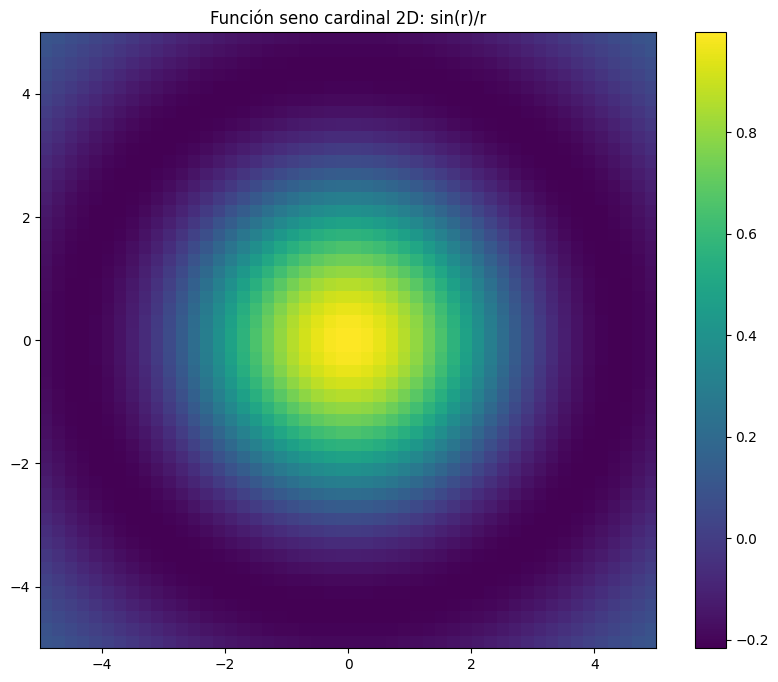

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3.1 Crea un array x con 50 valores equidistantes entre -5 y 5
x = np.linspace(-5, 5, 50)
print(x)

# 3.2 Crea un array y con 50 valores equidistantes entre -5 y 5
# y conviértelo en un array columna
y = np.linspace(-5, 5, 50)[:, np.newaxis]
print(y)

print(x.shape, y.shape)

# 3.3 Usa broadcasting para calcular la distancia de cada punto (x,y) al origen
# Fórmula: d = sqrt(x² + y²)
d = np.sqrt(x**2 + y**2)
print(d, d.shape)


# 3.4 Usa la distancia para calcular z = sin(d)/d
# (Esta es la función seno cardinal o sinc en 2D)
# Para evitar la división por cero, puedes usar np.where o np.divide con out=np.zeros_like
z = np.where(d > 1e-10, np.sin(d) / d, 1.0) # Límite de sin(x)/x cuando x->0 es 1


# 3.5 Visualiza la función como un mapa de calor
plt.figure(figsize=(10, 8))
# Tu código para mostrar z como una imagen
plt.figure(figsize=(10, 8))
plt.imshow(z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Función seno cardinal 2D: sin(r)/r')
plt.show()

1. `np.where(d > 1e-10, np.sin(d) / d, 1.0)` - Es una función condicional vectorizada que:
   
   - Evalúa cada valor en el array `d`
   - Para cada elemento donde `d > 1e-10` (es decir, valores suficientemente alejados de cero), calcula `np.sin(d) / d`
   - Para cada elemento donde `d ≤ 1e-10` (valores muy cercanos a cero), asigna el valor `1.0`

2. El comentario `# Límite de sin(x)/x cuando x->0 es 1` explica por qué se usa el valor 1.0 para valores cercanos a cero:
   - Matemáticamente, el límite de `sin(x)/x` cuando x tiende a 0 es exactamente 1
   - Pero computacionalmente, dividir por valores muy pequeños puede causar inestabilidad numérica o errores de división por cero
   - Por eso se usa una aproximación: cualquier valor menor que 1e-10 se trata como "efectivamente cero"